<div align=center style="font-weight:900;">Examen Introducción a la Programación para Ciencia de Datos</div>
<div align=center>(2023/2024)</div>
<br>
<div align=justify>Nota: No se puede utilizar ciclos explícitos (for/while/repeat) en ningún ejercicio. De hacerlo se
anulará el ejercicio correspondiente. El examen se resuelve en papel. Adjunto a este examen
dispone de una cheat sheet con las funciones más utilizadas en R.</div>

In [1]:
# install.packages("tidyverse")
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.1     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### **Ejercicio1**
Dado un data frame df con columnas: nombre_estudiante (tipo character),
apellido_estudiante (tipo character), asignatura (tipo character), género (factor, niveles [F,M]) y
nota (tipo numeric) se pide que, usando funciones del paquete tidyverse y stringr:

In [68]:

# Fijar semilla para reproducibilidad
set.seed(42)

# Definir una lista de 10 asignaturas diferentes
asignaturas <- c("Matematica", "Biologia", "Quimica", "Fisica", "Lengua", "Historia", "Geografia", "Ingles", "Arte", "Educacion Fisica")

# Crear un data frame con 100 estudiantes y asignaturas aleatorias
df <- tibble(
  nombre_estudiante = rep(c(
    "Juan", "Maria", "Pedro", "Ana", "Luis", "Lucia", "Carlos", "Elena", "Raul", "Sofia",
    "Javier", "Claudia", "Miguel", "Paula", "Antonio", "Sara", "Victor", "Raquel", "Jorge", "Marta"
  ), length.out = 100),
  
  apellido_estudiante = rep(c(
    "Perez", "Lopez", "Gonzalez", "Martinez", "Hernandez", "Garcia", "Rodriguez", "Sanchez", "Torres", "Ruiz",
    "Fernandez Lopez", "Gomez Diaz", "Diaz Romero", "Moreno Jimenez", "Jimenez Romero", "Romero Alvarez", "Alvarez Castro", "Vazquez Gil", "Castro Romero", "Gil Fernandez"
  ), length.out = 100),
  
  # Asignaturas aleatorias, repitiendo los 10 tipos
  asignatura = sample(asignaturas, size = 100, replace = TRUE),
  
  # Género alternado
  género = factor(rep(c("M", "F"), length.out = 100), levels = c("F", "M")),
  
  # Generar notas con algunas suspensas (por debajo de 5)
  nota = round(runif(100, 1, 10), 1)  # Notas aleatorias entre 1 y 10
)

# Ver los primeros datos
head(df)



nombre_estudiante,apellido_estudiante,asignatura,género,nota
<chr>,<chr>,<chr>,<fct>,<dbl>
Juan,Perez,Matematica,M,9.1
Maria,Lopez,Lengua,F,6.4
Pedro,Gonzalez,Matematica,M,6.7
Ana,Martinez,Arte,F,9.4
Luis,Hernandez,Educacion Fisica,M,8.7
Lucia,Garcia,Fisica,F,6.2


1. Muestre el primer apellido (si este es compuesto o todo el apellido si solo tiene uno) de
aquellas alumnas suspensas (nota menor a 5).

In [69]:
# Muestre el primer apellido (si este es compuesto o todo el apellido si solo tiene uno) de aquellas alumnas suspensas (nota menor a 5).
df %>% 
    filter(nota<5, género=="F") %>% 
    pull(apellido_estudiante) %>% 
    str_split(" ") %>% 
    lapply(function (x){ x[1] })
    
df %>% 
    filter(nota<5, género=="F")

[[1]]
[1] "Sanchez"

[[2]]
[1] "Gomez"

[[3]]
[1] "Gil"

[[4]]
[1] "Lopez"

[[5]]
[1] "Martinez"

[[6]]
[1] "Sanchez"

[[7]]
[1] "Moreno"

[[8]]
[1] "Romero"

[[9]]
[1] "Vazquez"

[[10]]
[1] "Gil"

[[11]]
[1] "Lopez"

[[12]]
[1] "Garcia"

[[13]]
[1] "Moreno"

[[14]]
[1] "Gil"

[[15]]
[1] "Martinez"

[[16]]
[1] "Garcia"

[[17]]
[1] "Sanchez"

[[18]]
[1] "Gil"

[[19]]
[1] "Martinez"

[[20]]
[1] "Sanchez"

[[21]]
[1] "Gomez"

[[22]]
[1] "Vazquez"

[[23]]
[1] "Gil"

nombre_estudiante,apellido_estudiante,asignatura,género,nota
<chr>,<chr>,<chr>,<fct>,<dbl>
Elena,Sanchez,Educacion Fisica,F,2.0
Claudia,Gomez Diaz,Fisica,F,1.7
Marta,Gil Fernandez,Arte,F,2.3
Maria,Lopez,Lengua,F,3.9
Ana,Martinez,Fisica,F,4.5
Elena,Sanchez,Educacion Fisica,F,1.3
Paula,Moreno Jimenez,Ingles,F,2.8
Sara,Romero Alvarez,Fisica,F,2.6
Raquel,Vazquez Gil,Biologia,F,3.9


2. Calcule la nota media y la cantidad de aprobados por género y asignatura, pero sólo de
aquellas 5 asignaturas con mayor número de estudiantes

In [87]:
top_5_asignaturas <- (df %>% 
    group_by(asignatura) %>% 
    summarise(n_estudiantes= n()) %>% 
    arrange(desc(n_estudiantes)))$asignatura[1:5]

top_5_asignaturas

df %>% filter(asignatura%in%top_5_asignaturas)  %>% 
    group_by(asignatura, género) %>% 
    summarise(nota_media=mean(nota), n_aprobados = sum(nota>=5))

[1] "Biologia"         "Fisica"           "Lengua"           "Educacion Fisica"
[5] "Ingles"

`summarise()` has grouped output by 'asignatura'. You can override using the
`.groups` argument.


asignatura,género,nota_media,n_aprobados
<chr>,<fct>,<dbl>,<int>
Biologia,F,6.420000,4
Biologia,M,5.425000,4
Educacion Fisica,F,4.900000,3
Educacion Fisica,M,6.740000,4
Fisica,F,4.022222,2
Fisica,M,7.475000,4
Ingles,F,5.057143,3
Ingles,M,4.700000,1
Lengua,F,5.812500,6


### **Ejercicio2**
Escriba una función que dada una matriz numérica cuadrada mat (teniendo valor
por omisión una matriz de 2x2 rellena con NA) retorne una lista con los siguientes
componentes (llamados A y B):


In [120]:
m <- matrix(sample(c(-10:10, rep(NA,3)),16), nrow=4)
m

0,-9,1,NA
-3,-5,7,-2
2,NA,6,-4
3,-8,4,8


1. Los elementos positivos de la diagonal secundaria (un NA no se considera positivo).


In [121]:
f <- function(mat=matrix(rep(NA,4),nrow=2)){
    diag <- diag(mat[nrow(mat):1,])
    diag <- replace_na(diag,-1)
    diag[diag>0]
}
f(m)

[1] 3 7

2. Un vector con los valores mínimos de cada columna, excluyendo los NAs

In [110]:
apply(m,2, function (x){min(x, na.rm=TRUE)})

[1]  -5  -9  -3 -10

### **Ejercicio3**
Dado el data frame resultante del df del primer ejercicio agregue una nueva
columna aprobado de tipo factor ordenado que indique si el estudiante tiene matricula de
honor (si su nota es 10), sobresaliente (si su nota es mayor o igual a 9), notable (entre 7 y 9),
aprobado (entre 5 y 7) o suspenso (menor a 5 o NA). 

In [128]:
df[1,]$nota <- 10
head(df,1)

nombre_estudiante,apellido_estudiante,asignatura,género,nota
<chr>,<chr>,<chr>,<fct>,<dbl>
Juan,Perez,Matematica,M,10


In [134]:
df_ <- df %>% mutate(nota=replace_na(nota,-1)) %>%
        mutate(
            aprobado = cut(nota, 
                breaks = c(-2,5,7,9,9.999,11), 
                labels = c("suspenso", "aprobado", "notable", "sobresaliente", "matricula de honor"),
                ordered = TRUE)
            )

df_  %>% head(10)

nombre_estudiante,apellido_estudiante,asignatura,género,nota,aprobado
<chr>,<chr>,<chr>,<fct>,<dbl>,<ord>
Juan,Perez,Matematica,M,10.0,matricula de honor
Maria,Lopez,Lengua,F,6.4,aprobado
Pedro,Gonzalez,Matematica,M,6.7,aprobado
Ana,Martinez,Arte,F,9.4,sobresaliente
Luis,Hernandez,Educacion Fisica,M,8.7,notable
Lucia,Garcia,Fisica,F,6.2,aprobado
Carlos,Rodriguez,Biologia,M,8.4,notable
Elena,Sanchez,Educacion Fisica,F,2.0,suspenso
Raul,Torres,Matematica,M,7.9,notable


Utilizando este nueva columna realice un
(único) gráfico de diagrama de barras mediante el paquete ggplot2 de las notas, facetando el
gráfico por cada asignatura. Asegúrese que el gráfico tenga claramente indicados los ejes

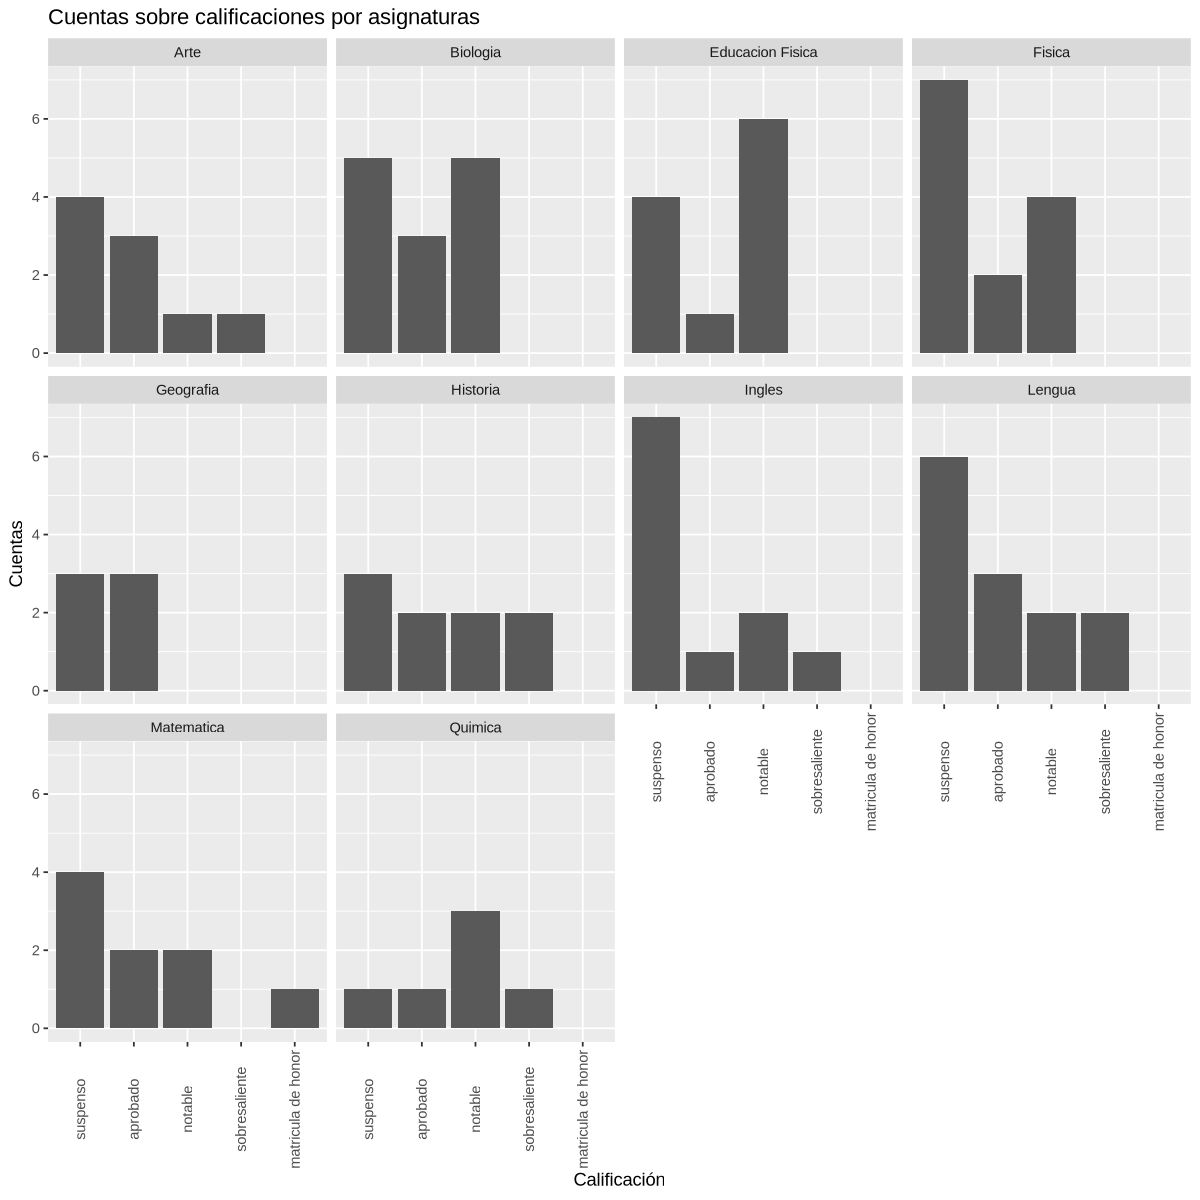

In [142]:
options(repr.plot.width=10, repr.plot.height=10)
ggplot(df_, aes(x = aprobado))+
    geom_bar()+
    facet_wrap(~asignatura)+
    labs(x="Calificación", y="Cuentas", title="Cuentas sobre calificaciones por asignaturas")+
    theme(axis.text.x = element_text(angle = 90, vjust = 0.5))

### **Ejercicio4**
Dado un vector v de caracteres y otro vector w numérico, intercale de forma
eficiente ambos vectores. Asuma que ambos vectores tienen el mismo tamaño. Ej: v=[“hola”,
“mundo”], w=[1,6], res=[“hola”,”1”,”mundo”,”6”

In [152]:
(v <- sample(letters,10, replace = TRUE))
(w <- sample(-100:100, 10, replace = TRUE))

n <- 2*length(v)
x <- rep(NA, 2*n)
x[(1:(2*n))%%2==0] <- w
x[(1:(2*n))%%2!=0] <- v
x

[1] "y" "z" "f" "c" "a" "o" "d" "i" "a" "k"

[1]  97 -81  41  36  -9  58  51  97  49 -90

[1] "y"   "97"  "z"   "-81" "f"   "41"  "c"   "36"  "a"   "-9"  "o"   "58" 
[13] "d"   "51"  "i"   "97"  "a"   "49"  "k"   "-90" "y"   "97"  "z"   "-81"
[25] "f"   "41"  "c"   "36"  "a"   "-9"  "o"   "58"  "d"   "51"  "i"   "97" 
[37] "a"   "49"  "k"   "-90"